In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tqdm import tqdm

from tensorflow.keras.applications import MobileNet, MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
print(tf.__version__)

2.19.0-dev20241106


In [3]:
data = pd.read_csv('train.csv')
data.shape


(2058, 9)

In [4]:
data.head()

,Name,Spice,Belimbing Sayur,Bunga Lawang,Jahe,Jeruk Nipis,Kunyit,Lengkuas,Mengkudu
0,Belimbing Sayur_1,['Belimbing Sayur'],1,0,0,0,0,0,0
1,Belimbing Sayur_2,['Belimbing Sayur'],1,0,0,0,0,0,0
2,Belimbing Sayur_3,['Belimbing Sayur'],1,0,0,0,0,0,0
3,Belimbing Sayur_4,['Belimbing Sayur'],1,0,0,0,0,0,0
4,Belimbing Sayur_5,['Belimbing Sayur'],1,0,0,0,0,0,0


In [5]:
IMAGE_WIDTH =  224
IMAGE_HEIGHT = 224

X=[]

for i in tqdm(range(data.shape[0])) : 
    path = 'Dataset/train/' + data['Name'][i]+'.png'
    img =  image.load_img(path, target_size=(IMAGE_WIDTH,IMAGE_HEIGHT, 3))
    img = image.img_to_array(img)
    img = img/255.0
    X.append(img)
    
X=np.array(X)

 70%|███████   | 1450/2058 [00:38<00:13, 43.64it/s]c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
100%|██████████| 2058/2058 [00:49<00:00, 41.69it/s] 


In [6]:
X.shape

(2058, 224, 224, 3)

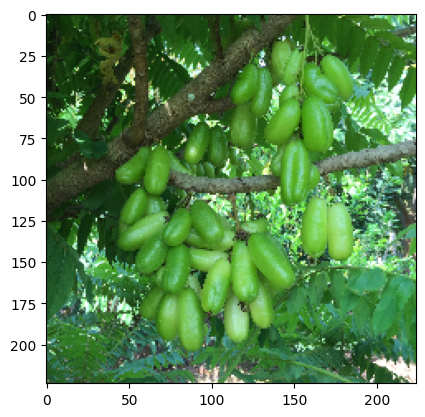

In [7]:
plt.imshow(X[0])

In [8]:
data['Spice'][0]

"['Belimbing Sayur']"

In [9]:
y = data.drop(['Name', 'Spice'], axis=1)
y = y.to_numpy()
y.shape

(2058, 7)

In [10]:
X_train, X_test, y_train, y_test =  train_test_split(X,y, random_state=0, test_size=0.20)
print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (1646, 224, 224, 3) (1646, 7)
Test shape: (412, 224, 224, 3) (412, 7)


In [58]:
# train_datagen = ImageDataGenerator(
#     rotation_range=20,  # Rotate images up to 20 degrees
#     width_shift_range=0.2,  # Shift images horizontally by 20% of width
#     height_shift_range=0.2,  # Shift images vertically by 20% of height
#     shear_range=0.2,  # Shear transformation
#     zoom_range=0.2,  # Zoom in/out by 20%
#     horizontal_flip=True,  # Flip images horizontally
#     fill_mode='reflect'  # Fill pixels after transformation
# )

# test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)  # No augmentations for validation


In [14]:
# Data augmentation for training and rescaling for validation
train_datagen = ImageDataGenerator(
    rescale=1/255,
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='reflect'
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)


In [15]:
# Apply augmentations to training set
train_generator = train_datagen.flow(
    X_train,
    y_train,
    batch_size=32
)

# Validation generator without augmentation
validation_generator = test_datagen.flow(
    X_test,
    y_test,
    batch_size=32
)

## Building CNN Model

In [16]:
# Load the pre-trained MobileNetV2 model
pre_trained_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False)

# Freeze the layers of the pre-trained model
for layer in pre_trained_model.layers:
    layer.trainable = False


AttributeError: module 'ml_dtypes' has no attribute 'float8_e3m4'


In [17]:
def based_model():
    model = tf.keras.models.Sequential([
        pre_trained_model,
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(7, activation='sigmoid')  # Change to sigmoid for multi-label
    ])
    return model


In [18]:
# def based_model():
#     model = tf.keras.models.Sequential([
#         Conv2D(16, (3,3), activation='relu', input_shape=X_train[0].shape),
#         BatchNormalization(),
#         MaxPool2D(2,2),
#         Dropout(0.3),
        
#         Conv2D(32, (3,3), activation='relu'),
#         BatchNormalization(),
#         MaxPool2D(2,2),
#         Dropout(0.3),
        
#         Conv2D(64, (3,3), activation='relu'),
#         BatchNormalization(),
#         MaxPool2D(2,2),
#         Dropout(0.4),
        
#         Conv2D(128, (3,3), activation='relu'),
#         BatchNormalization(),
#         MaxPool2D(2,2),
#         Dropout(0.5),
        
#         Flatten(),
#         Dense(128, activation='relu'),
#         BatchNormalization(),
#         Dropout(0.5),
        
#         Dense(128, activation='relu'),
#         BatchNormalization(),
#         Dropout(0.5),
        
#         Dense(7, activation='sigmoid')  # Change to sigmoid for multi-label
#     ])
#     return model


In [19]:
model=based_model()
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 62720)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     8,028,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,294,983 (39.27 MB)

 Trainable params: 8,036,999 (30.66 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [20]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss ='binary_crossentropy',
              metrics=['accuracy'])

In [23]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',  # Metric yang diamati
    patience=5,          # Epoch tanpa perbaikan sebelum pelatihan dihentikan
    restore_best_weights=True  # Kembalikan bobot terbaik setelah pelatihan berhenti
)

from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',  # Metric yang diamati
    factor=0.1,          # Faktor pengurangan learning rate (misal, dikali 0.1)
    patience=3,          # Epoch tanpa perbaikan sebelum learning rate dikurangi
    min_lr=1e-6          # Batas minimum learning rate
)


# Callbacks
class EarlyStoppingCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        train_accuracy = logs.get('accuracy')
        val_accuracy = logs.get('val_accuracy')

        if train_accuracy >= 0.95 and val_accuracy >= 0.75:
            self.model.stop_training = True
            print("\nReached 95% train accuracy and 85% validation accuracy, so cancelling training!")


In [24]:
history = model.fit(
    train_generator,  # Augmented training data
    epochs=500,
    validation_data=validation_generator,
    shuffle=True,
    callbacks=[EarlyStoppingCallback(), early_stopping, reduce_lr]
)

Epoch 1/500
52/52 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.1463 - loss: 0.4245 - val_accuracy: 0.1044 - val_loss: 0.4194 - learning_rate: 0.0010
Epoch 2/500
52/52 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.1599 - loss: 0.4298 - val_accuracy: 0.1044 - val_loss: 0.4278 - learning_rate: 0.0010
Epoch 3/500
52/52 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.1284 - loss: 0.4247 - val_accuracy: 0.1044 - val_loss: 0.4150 - learning_rate: 0.0010
Epoch 4/500
52/52 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.1531 - loss: 0.4221 - val_accuracy: 0.1044 - val_loss: 0.4120 - learning_rate: 0.0010
Epoch 5/500
52/52 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.1566 - loss: 0.4142 - val_accuracy: 0.1044 - val_loss: 0.4113 - learning_rate: 0.0010
Epoch 6/500
52/52 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.1406 - loss: 0.4163 - val_accuracy: 0.1044 - val_loss: 0.4110 - learning_rate: 0.0010
Epoch 7/500
52/52 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.1503 - loss: 0.4155 - val_acc